In [5]:
!pip install tqdm
!pip install scikit-learn
!pip install "tensorflow==2.10"
!pip install "numpy<2" --force-reinstall
!pip install matplotlib
!pip install torch
!pip install opencv-python
!pip install keras
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow==2.10 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.10


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [6]:
import numpy as np
import tensorflow as tf
import sys
import keras
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Conv2DTranspose,Concatenate,Input,Activation,Flatten,Dense
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from  tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
# from scipy.io import loadmat
# import h5py
import tensorflow as tf
from tensorflow.keras.utils import register_keras_serializable
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


C:\Github Projects\DSGP-Brain-Tumor-Detection\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [8]:
tf.debugging.set_log_device_placement(True)

In [9]:
dataset = "C:\IIT campus\Second Year\DSGP\Segementation_1\Segementation_1"

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\chanu\AppData\Local\Temp\ipykernel_16716\1458897051.py:1: SyntaxWarning: invalid escape sequence '\I'
  dataset = "C:\IIT campus\Second Year\DSGP\Segementation_1\Segementation_1"


In [10]:
image_files=sorted(os.listdir('C:\IIT campus\Second Year\DSGP\Segementation_1\images'))
mask_files=sorted(os.listdir('C:\IIT campus\Second Year\DSGP\Segementation_1\masks'))

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\chanu\AppData\Local\Temp\ipykernel_16716\1236682311.py:1: SyntaxWarning: invalid escape sequence '\I'
  image_files=sorted(os.listdir('C:\IIT campus\Second Year\DSGP\Segementation_1\images'))
C:\Users\chanu\AppData\Local\Temp\ipykernel_16716\1236682311.py:2: SyntaxWarning: invalid escape sequence '\I'
  mask_files=sorted(os.listdir('C:\IIT campus\Second Year\DSGP\Segementation_1\masks'))


In [11]:
print(image_files[:10])
print(mask_files[:10])

['1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png']
['1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png']


In [12]:
def display_image_mask(image_path,mask_path):
    count=0
    for image_file,mask_file in zip(image_files,mask_files):
        if count>=6:
            break
        image_path_full=os.path.join(image_path,image_file)
        mask_path_full=os.path.join(mask_path,mask_file)

        image=cv2.imread(image_path_full)
        mask=cv2.imread(mask_path_full,cv2.IMREAD_GRAYSCALE)

        if image is None:
                raise ValueError(f"Image at path {imagepath_full} could not be loaded")
        if mask is None:
                raise ValueError(f"Mask at path {maskpath_full} could not be loaded")

        mask_3ch=cv2.merge([mask,mask,mask])
        image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10,10))

        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title('Image')

        plt.subplot(1, 3, 2)
        plt.imshow(mask)
        plt.title('Mask')

        plt.subplot(1,3,3)
        overlay = cv2.addWeighted(image_rgb, 0.7, mask_3ch, 0.3, 0)
        plt.imshow(overlay)
        plt.title("Image with overlay")

        plt.show()
        count+=1

In [13]:
image_path='C:\IIT campus\Second Year\DSGP\Segementation_1\images'
mask_path='C:\IIT campus\Second Year\DSGP\Segementation_1\masks'

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\chanu\AppData\Local\Temp\ipykernel_16716\2573002073.py:1: SyntaxWarning: invalid escape sequence '\I'
  image_path='C:\IIT campus\Second Year\DSGP\Segementation_1\images'
C:\Users\chanu\AppData\Local\Temp\ipykernel_16716\2573002073.py:2: SyntaxWarning: invalid escape sequence '\I'
  mask_path='C:\IIT campus\Second Year\DSGP\Segementation_1\masks'


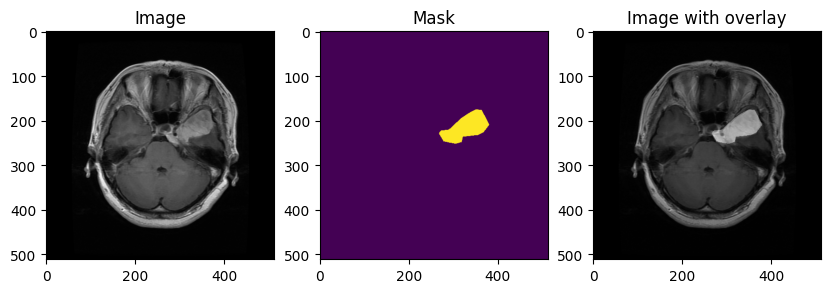

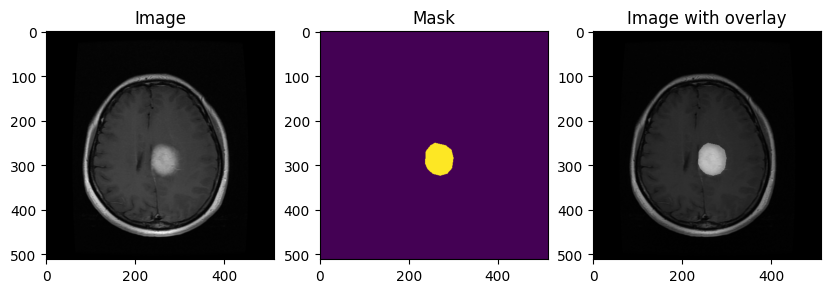

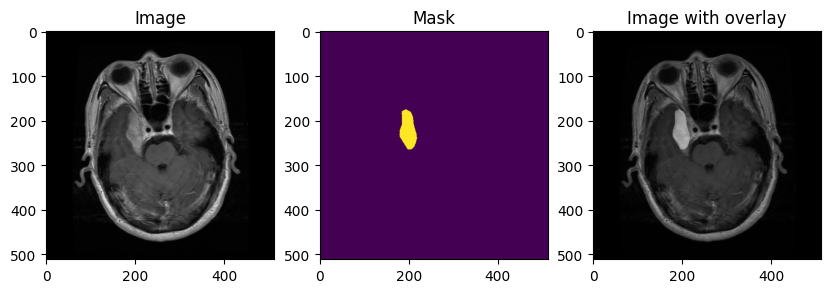

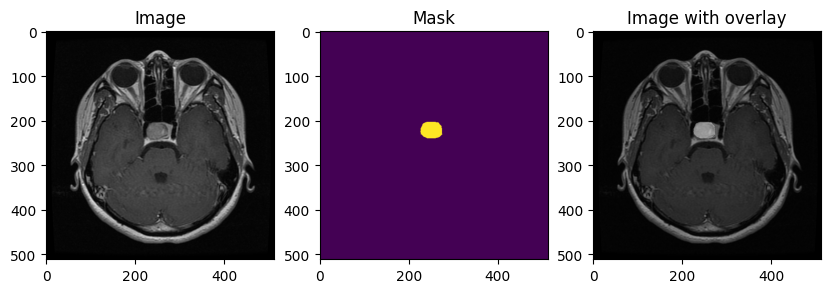

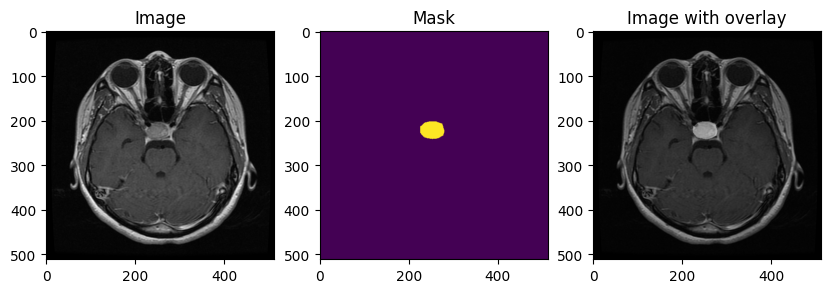

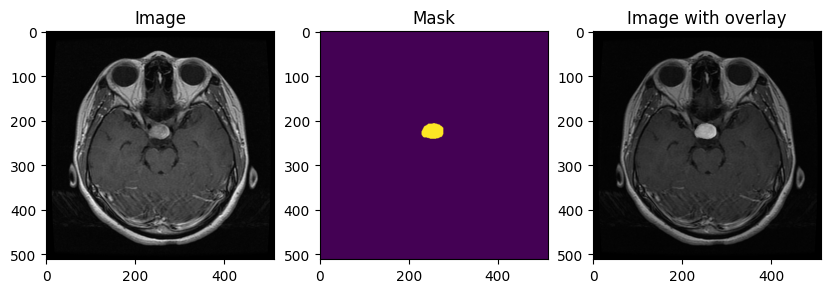

In [14]:
display_image_mask(image_path,mask_path)


In [15]:
images_size=[]
masks_size=[]
#Check images shape
for image_file, mask_file in tqdm(zip(image_files, mask_files)):

    imagepath_full = os.path.join(image_path, image_file)
    maskpath_full = os.path.join(mask_path, mask_file)

    image = cv2.imread(imagepath_full)
    mask = cv2.imread(maskpath_full)

    images_size.append(image.shape)
    masks_size.append(mask.shape)

3052it [00:58, 51.97it/s]


In [16]:
print(list(set(images_size)))
print(list(set(masks_size)))

[(512, 512, 3), (256, 256, 3)]
[(512, 512, 3), (256, 256, 3)]


In [17]:
SIZE=224
CHANNEL=1

In [18]:
def preprocessing_images_masks(num_samples=None):
    images=[]
    masks=[]

    if num_samples is not None:
        selected_image_files = image_files[:num_samples]
        selected_mask_files = mask_files[:num_samples]
    else:
        selected_image_files = image_files
        selected_mask_files = mask_files

    for image_file, mask_file in tqdm(zip(selected_image_files, selected_mask_files)):
        imagepathfull=os.path.join(image_path,image_file)
        maskpathfull=os.path.join(mask_path,mask_file)

        image = cv2.imread(imagepathfull,cv2.IMREAD_GRAYSCALE)  #load img
        image = cv2.resize(image,(SIZE,SIZE))
        image=cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
        image = image/255.0  #normalizes pixel values 0-1
        images.append(image)

        mask = cv2.imread(maskpathfull,cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask,(SIZE,SIZE))
        mask = mask/255.0
        masks.append(mask)
    #add a channel to mask (depth of information per pixel(1))
    return np.array(images), np.expand_dims(np.array(masks), axis=-1)

In [19]:
X,y=preprocessing_images_masks(num_samples=10)


10it [00:00, 333.37it/s]


In [20]:
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (10, 224, 224, 3)
Shape of y: (10, 224, 224, 1)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [22]:
print('The shape of X_train',X_train.shape)
print('The shape of y_train',y_train.shape)
print('The shape of X_test',X_test.shape)
print('The shape of y_test',y_test.shape)

The shape of X_train (8, 224, 224, 3)
The shape of y_train (8, 224, 224, 1)
The shape of X_test (2, 224, 224, 3)
The shape of y_test (2, 224, 224, 1)


In [23]:
#avoid division by zero
smooth = 1e-15

#decor- save custom function with model
@keras.saving.register_keras_serializable()
#metric for overlap between prediction and ground truth
def dice_coef(y_true, y_pred):
    #convert multi dimensions to 1D
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)

    #common positive pixels
    intersection = tf.reduce_sum(y_true * y_pred)

    #balances TN and FP
    return (2. * intersection + smooth) / (
        tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth
    )

# @register_keras_serializable()
@keras.saving.register_keras_serializable()
#define loss function base one coef
def dice_loss(y_true, y_pred):
    #Reduce tumor mismatch
    return 1.0 - dice_coef(y_true, y_pred)

In [24]:
# log tensorflow informations
tf.debugging.set_log_device_placement(True)

In [25]:
#data augmentation
train_datagen=(ImageDataGenerator
               (brightness_range=(0.9,1.1),#Randomly adjust brightness
               zoom_range=[.9,1.1],#Random zoom applied
               fill_mode='nearest') #Prevents unnatural
               )
val_datagen=ImageDataGenerator()

In [26]:
#extracts features and learn pattern from the input image
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input) #learn patterns
    x = BatchNormalization()(x)  #stabilizes training
    x = Activation("relu")(x)    #network to learn complex features.(Introduces non-linearity)

    #combine learn pattern into meaningful region
    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

In [27]:
#increase resolution and merge encoder info in tumor mask
def decoder_block(input, skip_features, num_filters):
    #Upsampling (double spatial resolution)
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

In [28]:

# def build_resnet50_unet(input_shape):
#     """ Input """
#     inputs = Input(shape=input_shape)
#
#     """ Pre-trained ResNet50 Model """
#     resnet50 = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs)
#
#     """ Encoder """
#     s1 = inputs                                         ## (224 x 224) - Use inputs directly
#     s2 = resnet50.get_layer("conv1_relu").output        ## (112 x 112)
#     s3 = resnet50.get_layer("conv2_block3_out").output  ## (56 x 56)
#     s4 = resnet50.get_layer("conv3_block4_out").output  ## (28 x 28)
#
#     """ Bridge """
#     b1 = resnet50.get_layer("conv4_block6_out").output  ## (14 x 14)
#
#     """ Decoder """
#     d1 = decoder_block(b1, s4, 512)                     ## (28 x 28)
#     d2 = decoder_block(d1, s3, 256)                     ## (56 x 56)
#     d3 = decoder_block(d2, s2, 128)                     ## (112 x 112)
#     d4 = decoder_block(d3, s1, 64)                      ## (224 x 224)
#
#     """ Output """
#     outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)
#
#     model = Model(inputs, outputs, name="ResNet50_U-Net")
#     return model
#
# input_shape = (224, 224, 3)
# model = build_resnet50_unet(input_shape)
# model.summary()

In [29]:
def build_light_resnet50_unet(input_shape):
    inputs = Input(shape=input_shape)
    resnet50 = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs)

    # Encoder (skip connections)
    s1 = inputs                                      # 224 x 224 x 3
    s2 = resnet50.get_layer("conv1_relu").output     # 112 x 112 x 64
    s3 = resnet50.get_layer("conv2_block3_out").output  # 56 x 56 x 256

    # Bridge(compressed view)
    b1 = resnet50.get_layer("conv3_block4_out").output  # 28 x 28 x 512

    # Decoder
    d1 = decoder_block(b1, s3, 128)   # 56 x 56
    d2 = decoder_block(d1, s2, 64)    # 112 x 112
    d3 = decoder_block(d2, s1, 32)    # 224 x 224

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d3)

    model = Model(inputs, outputs, name="LightResNet50_U-Net")
    return model


input_shape = (224, 224, 3)
model = build_light_resnet50_unet(input_shape)
model.summary()

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:loc

Model: "LightResNet50_U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 2,485,409 (9.48 MB)

 Trainable params: 2,474,401 (9.44 MB)

 Non-trainable params: 11,008 (43.00 KB)

In [30]:
model_checkpoint  = ModelCheckpoint('best_model_checkpoint.keras', save_best_only=True,
                                    monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
reduceLR = ReduceLROnPlateau(patience=4, verbose=2, monitor='val_loss',min_lr=1e-4, mode='min')

callback_list = [early_stopping, reduceLR, model_checkpoint]

In [31]:
batch_size = 16

train_generator = train_datagen.flow( X_train, y_train, batch_size=batch_size, shuffle=True)

val_generator = val_datagen.flow(X_test, y_test, batch_size=batch_size, shuffle=False)

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=dice_loss,
              metrics=[dice_coef, 'accuracy'])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localh

In [33]:
history = model.fit(
    X_train, y_train,
    batch_size=4,  # Reduced from 32 to 4
    epochs=100,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=callback_list
)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatase

In [34]:
model.save('resnet50_trained_model_batch_size_4.keras')

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /j

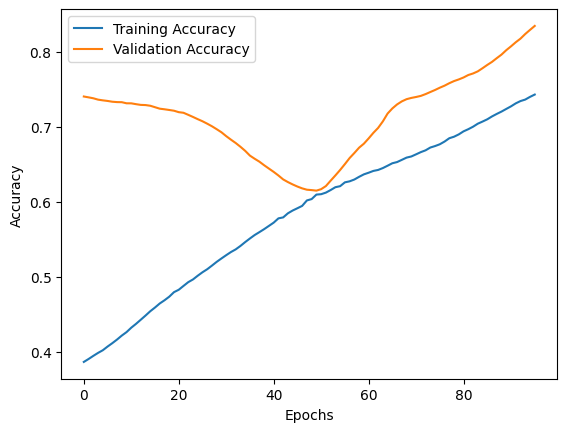

In [35]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

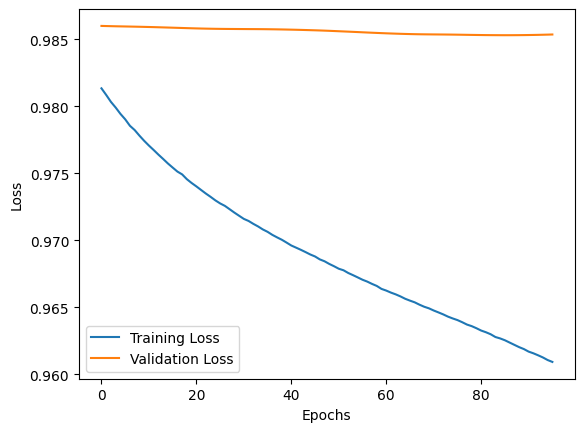

In [36]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
loss,dice_coef,accuracy=model.evaluate(X_test,y_test)
print(f'Loss is {loss}')
print(f'Accuracy is {accuracy}')
print(f'Dice_Coef is {dice_coef}')

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Pr

In [38]:
model.save("unet_resnet50_backbone.keras")


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /j

In [62]:
from tensorflow.keras.models import load_model

model = load_model(
    "best_model_checkpoint_1",   # ← folder, NOT file
    compile=False
)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:loca

In [63]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(np.uint8)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

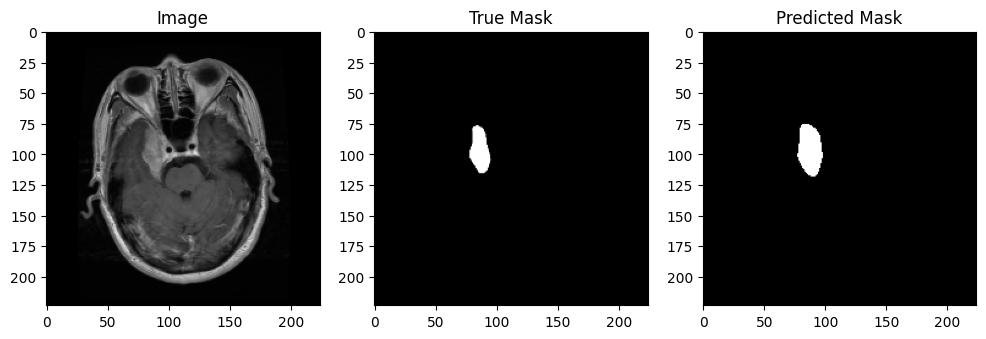

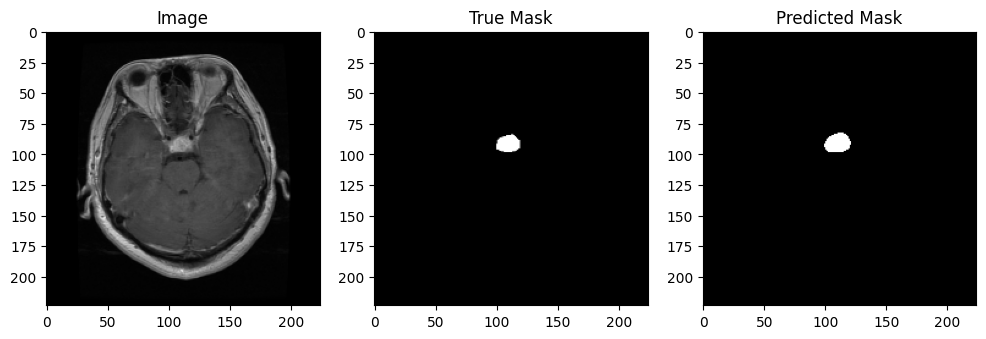

IndexError: index 2 is out of bounds for axis 0 with size 2

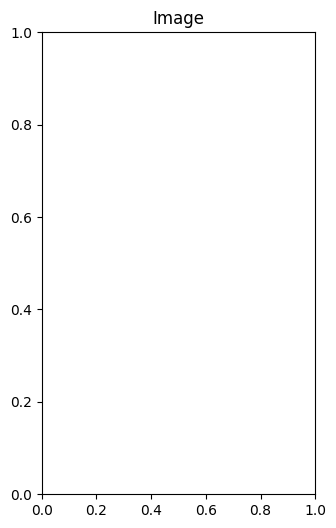

In [90]:
for i in range(10):

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(X_test[i],cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(y_test[i].squeeze(), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(y_pred[i].squeeze(), cmap='gray')

    plt.show()

In [103]:
import numpy as np
#
# def overlay_mask(image, mask, alpha=0.4):
#     overlay = image.copy()
#     red = np.zeros_like(image)
#     red[..., 0] = 255
#
#     overlay[mask > 0] = (
#         (1 - alpha) * image[mask > 0] +
#         alpha * red[mask > 0]
#     ).astype(np.uint8)
#
#     return overlay
#

def overlay_mask(image, mask, alpha=0.4):
    # 1. Ensure the image is RGB even if it's grayscale
    if len(image.shape) == 2 or image.shape[-1] == 1:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    else:
        image_rgb = image.copy()

    # 2. Create a red overlay
    overlay = image_rgb.copy()
    red_color = np.zeros_like(image_rgb)
    red_color[:, :] = [255, 0, 0]  # Set all mask pixels to Red

    # 3. Blend only where the mask exists
    mask_indices = mask > 0
    overlay[mask_indices] = (
        (1 - alpha) * image_rgb[mask_indices] +
        alpha * red_color[mask_indices]
    ).astype(np.uint8)

    return overlay


Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

IndexError: index 2 is out of bounds for axis 0 with size 2

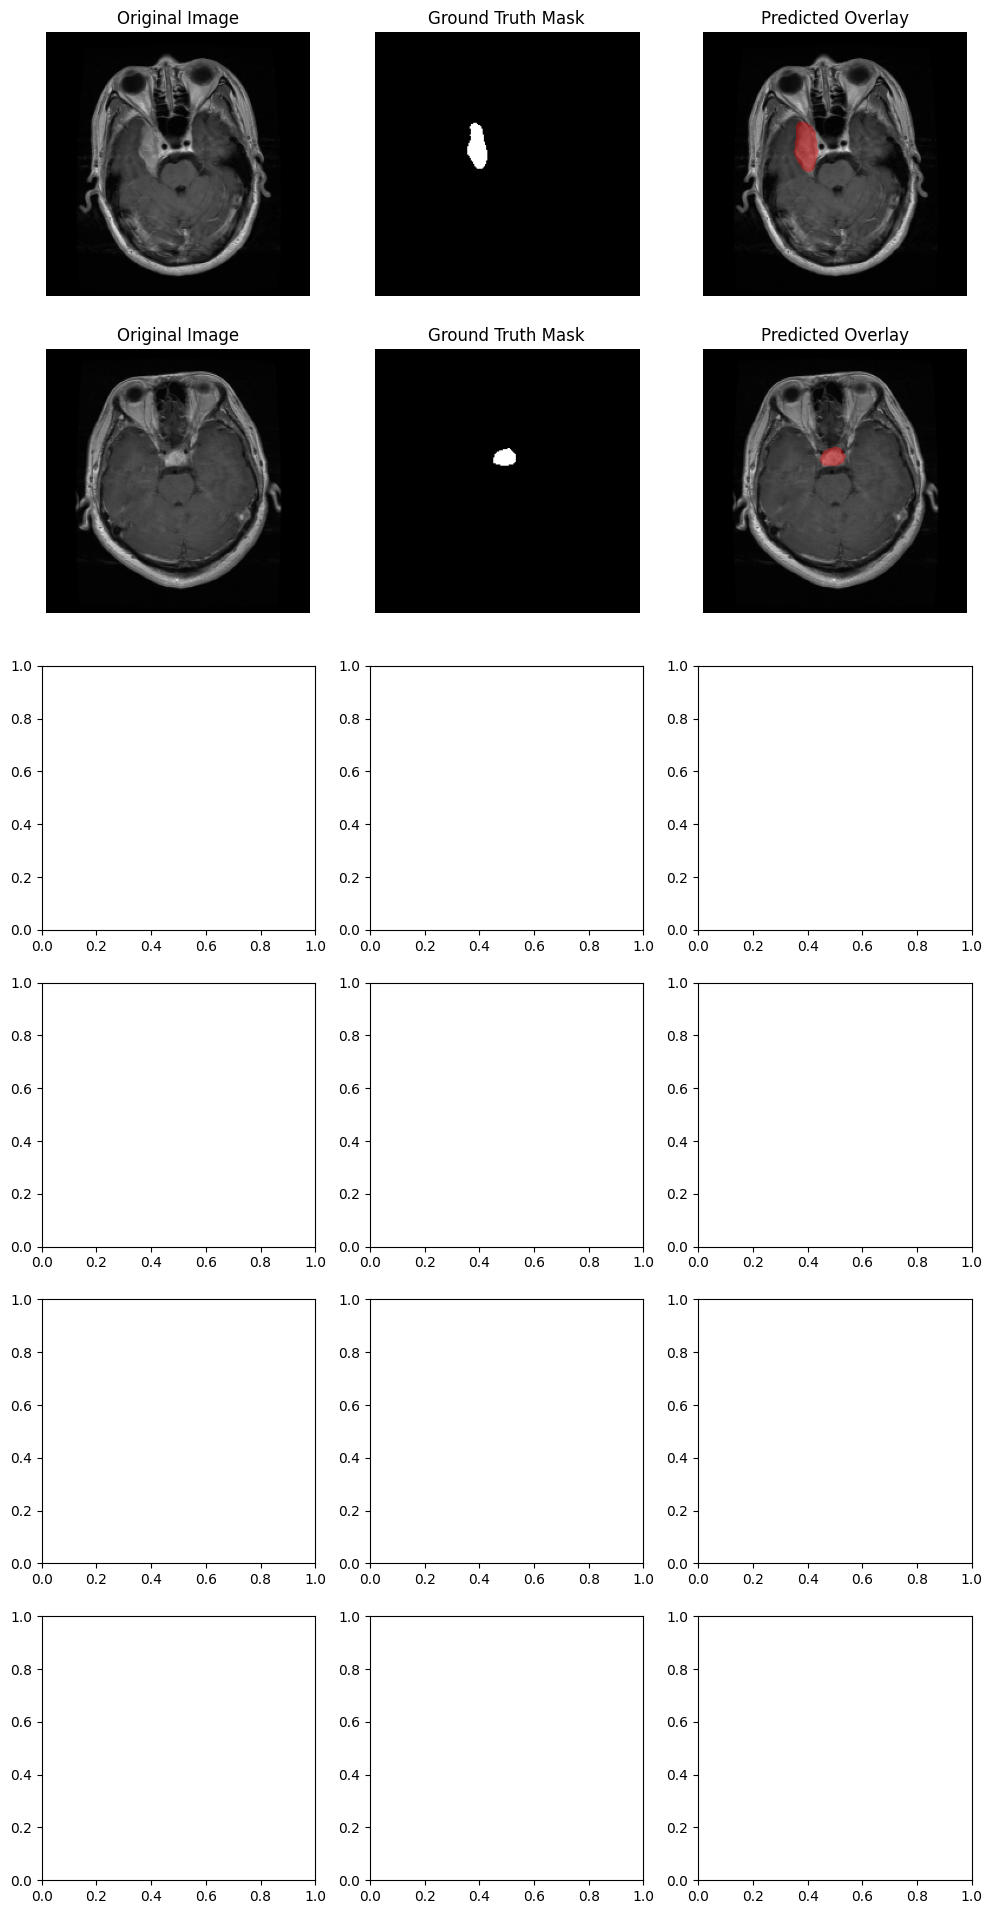

In [105]:
import matplotlib.pyplot as plt
import numpy as np

n_show = 6
fig, axs = plt.subplots(n_show, 3, figsize=(12, 4 * n_show))

for i in range(n_show):

    # Image (already loaded)
    img = X_test[i]

    # If normalized, bring back to uint8 for display
    if img.max() <= 1.0:
        img = (img * 255).astype(np.uint8)

    # Ground truth mask
    gt_mask = y_test[i]
    if gt_mask.ndim == 3:
        gt_mask = gt_mask.squeeze()
    gt_mask = (gt_mask > 0.5).astype(np.uint8)

    # Prepare input for model
    input_img = img.astype(np.float32) / 255.0
    input_img = np.expand_dims(input_img, axis=0)

    # Predict mask
    pred_prob = model.predict(input_img, verbose=0)[0, :, :, 0]
    pred_mask = (pred_prob > 0.5).astype(np.uint8)

    # Overlay prediction
    overlay_img = overlay_mask(img, pred_mask)

    # Plot

    axs[i, 0].imshow(img, cmap="gray")
    axs[i, 0].set_title("Original Image")
    axs[i, 0].axis("off")

    axs[i, 1].imshow(gt_mask, cmap="gray")
    axs[i, 1].set_title("Ground Truth Mask")
    axs[i, 1].axis("off")

    axs[i, 2].imshow(overlay_img)

    axs[i, 2].set_title("Predicted Overlay")
    axs[i, 2].axis("off")



plt.tight_layout()
plt.show()
